### Lecture 9 - exercise Boston dataset

### Info about dataset
    :Attribute Information (in order):
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - MEDV      Median value of owner-occupied homes in $1000's

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv('data/housing.csv')
df.head()

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,MEDV
0,18.0,2.31,0.0,NaN,6.575,65.2,4.0900,1.0,296.0,15.3,24.0
1,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,21.6
2,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,34.7
3,0.0,2.18,0.0,NaN,6.998,45.8,6.0622,3.0,222.0,18.7,33.4
4,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,36.2


In [3]:
df.shape

(506, 11)

In [6]:
df.isnull().sum()
#exist null value in four columns: CHAS, NOX, AGE, DIS

ZN           0
INDUS        0
CHAS        10
NOX        315
RM           0
AGE          3
DIS         38
RAD          0
TAX          0
PTRATIO      0
MEDV         0
dtype: int64

In [21]:
#Becasue NOX column have a lot of null we can drop this colum
df.drop('NOX', axis = 1, inplace = True)
df.columns

Index(['ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
       'MEDV'],
      dtype='object')

In [24]:
#Columns CHAS have 10 null values, check for balance between values
df['CHAS'].value_counts()

0.0    463
1.0     33
Name: CHAS, dtype: int64

In [26]:
#binary, True and False. Clear majority of 0, so convert null values to 0. 
df['CHAS'].fillna(0, inplace = True)
df['CHAS'].value_counts()

0.0    473
1.0     33
Name: CHAS, dtype: int64

In [47]:
#AGE column, replace null with mean
df.fillna(df.mean())


,ZN,INDUS,CHAS,RM,DIS,RAD,TAX,PTRATIO,MEDV
0,18.0,2.31,0.0,6.575,4.0900,1.0,296.0,15.3,24.0
1,0.0,7.07,0.0,6.421,4.9671,2.0,242.0,17.8,21.6
2,0.0,7.07,0.0,7.185,4.9671,2.0,242.0,17.8,34.7
3,0.0,2.18,0.0,6.998,6.0622,3.0,222.0,18.7,33.4
4,0.0,2.18,0.0,7.147,6.0622,3.0,222.0,18.7,36.2
...,...,...,...,...,...,...,...,...,...
501,0.0,11.93,0.0,6.593,2.4786,1.0,273.0,21.0,22.4
502,0.0,11.93,0.0,6.120,2.2875,1.0,273.0,21.0,20.6
503,0.0,11.93,0.0,6.976,2.1675,1.0,273.0,21.0,23.9
504,0.0,11.93,0.0,6.794,2.3889,1.0,273.0,21.0,22.0


In [55]:
#DIS column, replace null with median
df['DIS'].fillna(df['DIS'].median(), inplace = True)


In [56]:
#no more null! 
df.isnull().sum()

ZN         0
INDUS      0
CHAS       0
RM         0
DIS        0
RAD        0
TAX        0
PTRATIO    0
MEDV       0
dtype: int64

<AxesSubplot:>

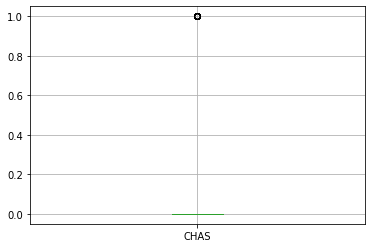

In [25]:
#create boxplot
df.boxplot('CHAS')

In [ ]:
#create scatterplot 